# Kernel Ridge Regression

## Scikit-Learn Implementation

In [1]:
from __future__ import (division, print_function)
import time
import warnings

import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import (GridSearchCV, 
                                     learning_curve, 
                                     validation_curve)
import matplotlib.pyplot as plt
%matplotlib inline

### Generate Data

In [2]:
# generate sample data
rng = np.random.RandomState(0)
x_data = 5 * rng.rand(1000,1)
y_data = np.sin(x_data).ravel()

# add noise to targets
y_data[::5] += 3 * (0.5 - rng.rand(x_data.shape[0] // 5))

x_plot = np.linspace(0, 5, 10000)[:, None]

### Fit Regression Model and Predict Test Data

In [3]:
# fit regression model
train_size = 800
alpha_params = np.logspace(-6,8,40)
gamma_params = np.logspace(-6,8,40)
n_jobs = -1
n_folds = 3

# perform grid search
CVModel = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
                        param_grid={"alpha": alpha_params, 
                                   "gamma": gamma_params},
                        verbose=1, 
                        n_jobs=-1,
                        cv=n_folds)

t0 = time.time()
warnings.filterwarnings('ignore')
CVModel.fit(x_data[:train_size],
            y_data[:train_size])
warnings.filterwarnings('default')
krr_fittime = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted" +
      " in {:.3f} s".format(krr_fittime))

t0 = time.time()
y_pred = CVModel.predict(x_plot)
krr_predtime = time.time() - t0
print("KRR prediction for {} inputs in {:.3f} s".
      format(x_plot.shape[0], krr_predtime))


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   58.1s finished


KRR complexity and bandwidth selected and model fitted in 58.391 s
KRR prediction for 10000 inputs in 0.172 s


### Plot Results

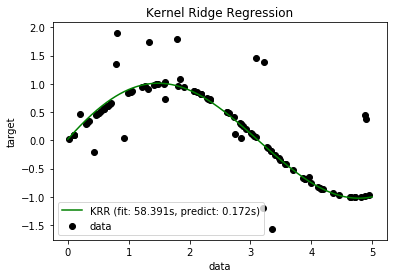

In [4]:
fig = plt.subplot()
plt.scatter(x_data[:100], y_data[:100], 
            c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(x_plot, y_pred, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % \
         (krr_fittime, krr_predtime))
plt.xlabel('data')
plt.ylabel('target')
plt.title('Kernel Ridge Regression')
plt.legend()

### Learning Curve

In [5]:
warnings.filterwarnings('ignore')
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(CVModel, x_data[:train_size], 
                   y_data[:train_size],
                   train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error")
warnings.filterwarnings('default')

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 484 tasks      | elapsed:    0.7s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4384 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:    1.7s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:    4.6s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Done 316 tasks      | elapsed:    0.9s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 4128 tasks      | elapsed:    8.8s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:   10.4s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:   10.3s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   15.1s finished
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    9.0s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   20.0s finished
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1696 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 4196 tasks      | elapsed:   19.5s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   22.3s finished
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1696 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 4196 tasks      | elapsed:   24.7s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   27.7s finished
[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:    0.9s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:    4.3s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 3712 tasks      | elapsed:    4.0s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    0.8s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:    9.5s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    6.1s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    6.8s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   15.2s finished
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   10.7s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   19.6s finished
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 2880 tasks      | elapsed:   12.6s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   21.5s finished
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2240 tasks      | elapsed:   12.9s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   27.0s finished
[Parallel(n_jobs=-1)]: Done 556 tasks      | elapsed:    1.2s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1696 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 4196 tasks      | elapsed:    7.4s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3712 tasks      | elapsed:    4.5s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:    5.6s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3712 tasks      | elapsed:    7.2s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2704 tasks      | elapsed:    6.6s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 2704 tasks      | elapsed:    8.3s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    8.2s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   18.6s finished
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   10.6s


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   21.2s finished
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 2524 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 4624 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   25.7s finished


#### Plot Learning Curve

In [6]:
print('Size of training_sizes: {}'.format(train_sizes_abs.shape))
print('Size of train_scores_kr: {}'.format(train_scores_kr.shape))
print('Size of test_scores_kr: {}'.format(test_scores_kr.shape))

Size of training_sizes: (10,)
Size of train_scores_kr: (10, 3)
Size of test_scores_kr: (10, 3)


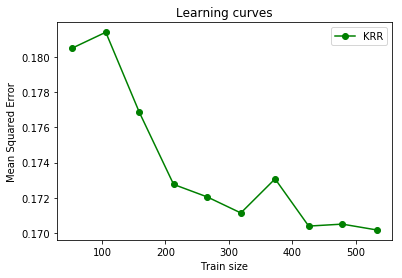

In [7]:
plt.plot(train_sizes_abs, -test_scores_kr.mean(1), 'o-', color="g",
         label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

### Validation Curve

In [8]:
print(CVModel.best_estimator_.alpha)
print(CVModel.best_estimator_.gamma)

0.00388815518031
0.0464158883361


### $\gamma$

In [9]:
# get validation curves
alpha = CVModel.best_estimator_.alpha
KRRModel = KernelRidge(kernel='rbf', alpha=alpha)

warnings.filterwarnings('ignore')
gamma_train_scores, gamma_test_scores = \
    validation_curve(KRRModel, 
                     x_data[:train_size], 
                     y_data[:train_size],
                     param_name = 'gamma',
                     param_range = gamma_params,
                     scoring="neg_mean_squared_error",
                     n_jobs=-1,
                     verbose=1)
warnings.filterwarnings('default')


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.5s finished


In [10]:
alpha_trscores_mean = np.abs(gamma_train_scores.mean(1))
alpha_trscores_std = np.abs(gamma_train_scores.std(1))
alpha_tescores_mean = np.abs(gamma_test_scores.mean(1))
alpha_tescores_std = np.abs(gamma_test_scores.std(1))

# print(alpha_train_scores)
# print(train_scores_mean)

#### Plot Validation Curve with $\gamma$

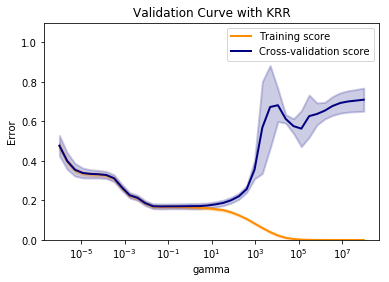

In [11]:
plt.title("Validation Curve with KRR")
plt.xlabel("gamma")
plt.ylabel("Error")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(gamma_params, alpha_trscores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(gamma_params, alpha_trscores_mean - alpha_trscores_std,
                 alpha_trscores_mean + alpha_trscores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(gamma_params, alpha_tescores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(gamma_params, alpha_tescores_mean - alpha_tescores_std,
                 alpha_tescores_mean + alpha_tescores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### $\alpha$

In [12]:
# get validation curves
gamma = CVModel.best_estimator_.gamma
KRRModel = KernelRidge(kernel='rbf', gamma=gamma)

warnings.filterwarnings('ignore')
alpha_train_scores, alpha_test_scores = \
    validation_curve(KRRModel, 
                     x_data[:train_size], 
                     y_data[:train_size],
                     param_name = 'alpha',
                     param_range = alpha_params,
                     scoring="neg_mean_squared_error",
                     n_jobs=-1,
                     verbose=1)
warnings.filterwarnings('default')


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.6s finished


In [13]:
train_scores_mean = np.abs(alpha_train_scores.mean(1))
train_scores_std = np.abs(alpha_train_scores.std(1))
test_scores_mean = np.abs(alpha_test_scores.mean(1))
test_scores_std = np.abs(alpha_test_scores.std(1))

#### Plot Validation Curve with $\gamma$

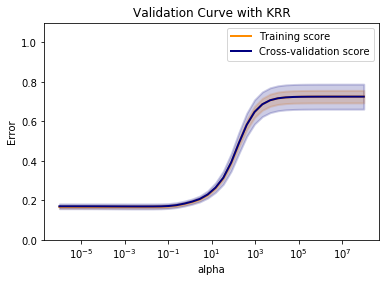

In [14]:
plt.title("Validation Curve with KRR")
plt.xlabel(u'alpha')
plt.ylabel("Error")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(alpha_params, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(alpha_params, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(alpha_params, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(alpha_params, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Parameter Grid

### Training Points

In [17]:
# plot the scores of the grid
score_dict = CVModel.cv_results_

grid_results = score_dict['mean_train_score']

print(score_dict.keys())
print(score_dict['mean_test_score'].shape)
print('Size of alpha, gamma range: {}, {}'.
      format(alpha_params.shape, gamma_params.shape))


print('Size of grid: {}'.format(grid_results.shape))
# grid_scores = np.array(score_dict['mean_train_score']). \
#     reshape(len(alpha_params), len(gamma_params))
# # extract the scores

grid_scores = np.array(grid_results).reshape(len(alpha_params), 
                                          len(gamma_params))

dict_keys(['split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'param_gamma', 'params'])
(1600,)
Size of alpha, gamma range: (40,), (40,)
Size of grid: (1600,)


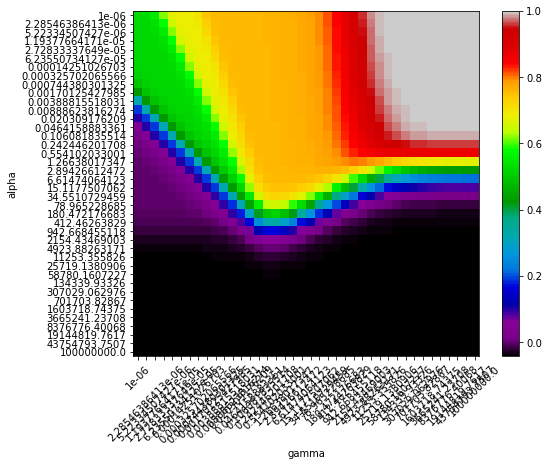

In [18]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
plt.imshow(grid_scores, interpolation='nearest', cmap=plt.cm.spectral)
plt.xlabel('gamma')
plt.ylabel('alpha')
plt.colorbar()
plt.xticks(np.arange(len(gamma_params)), gamma_params, rotation=45)
plt.yticks(np.arange(len(alpha_params)), alpha_params)
plt.show()